<a href="https://colab.research.google.com/github/Faareh-Ahmed/Anomaly-Detection/blob/main/Copy_of_Anomaly_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as ssn
import matplotlib.pyplot as plt
import pandas as pd
import os

# Storing the dataset

In [10]:

folder_path = '/content/sample_data/CICIoTdataset'

# Get a list of all CSV files in the specified folder
csv_files = [file for file in os.listdir(folder_path) if file.endswith('.csv')]

# Initialize an empty DataFrame
data = pd.DataFrame()

# Loop through each CSV file and concatenate the data to the main DataFrame
for csv_file in csv_files:
    file_path = os.path.join(folder_path, csv_file)
    temp_df = pd.read_csv(file_path)
    data = pd.concat([data, temp_df], ignore_index=True)



In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142345 entries, 0 to 142344
Data columns (total 47 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   flow_duration    142345 non-null  float64
 1   Header_Length    142345 non-null  float64
 2   Protocol Type    142345 non-null  float64
 3   Duration         142345 non-null  float64
 4   Rate             142345 non-null  float64
 5   Srate            142344 non-null  float64
 6   Drate            142344 non-null  float64
 7   fin_flag_number  142344 non-null  float64
 8   syn_flag_number  142344 non-null  float64
 9   rst_flag_number  142344 non-null  float64
 10  psh_flag_number  142344 non-null  float64
 11  ack_flag_number  142344 non-null  float64
 12  ece_flag_number  142344 non-null  float64
 13  cwr_flag_number  142344 non-null  float64
 14  ack_count        142344 non-null  float64
 15  syn_count        142344 non-null  float64
 16  fin_count        142344 non-null  floa

In [ ]:
data.head()

,flow_duration,Header_Length,Protocol Type,Duration,Rate,Srate,Drate,fin_flag_number,syn_flag_number,rst_flag_number,...,Std,Tot size,IAT,Number,Magnitue,Radius,Covariance,Variance,Weight,label
0,5.816370,108.00,6.0,64.00,0.343857,0.343857,0.0,0.0,0.0,0.0,...,0.000000,54.00,8.303384e+07,9.5,10.392305,0.000000,0.000000,0.00,141.55,DDoS-TCP_Flood
1,0.000000,55.42,6.0,65.91,26.663175,26.663175,0.0,0.0,1.0,0.0,...,1.629676,55.42,8.298090e+07,9.5,10.429518,2.315457,53.666325,0.05,141.55,DoS-SYN_Flood
2,3.998994,108.00,6.0,64.00,0.500126,0.500126,0.0,0.0,1.0,0.0,...,0.000000,54.00,8.298556e+07,9.5,10.392305,0.000000,0.000000,0.00,141.55,DoS-SYN_Flood
3,0.005473,75.88,6.0,64.00,30.471866,30.471866,0.0,0.0,1.0,0.0,...,0.189108,54.24,8.308972e+07,9.5,10.396685,0.269256,0.518037,0.07,141.55,DDoS-SYN_Flood
4,0.003508,4325.00,17.0,64.00,101072.724442,101072.724442,0.0,0.0,0.0,0.0,...,0.000000,50.00,8.310311e+07,9.5,10.000000,0.000000,0.000000,0.00,141.55,DDoS-UDP_Flood


In [ ]:
data.describe()

,flow_duration,Header_Length,Protocol Type,Duration,Rate,Srate,Drate,fin_flag_number,syn_flag_number,rst_flag_number,...,AVG,Std,Tot size,IAT,Number,Magnitue,Radius,Covariance,Variance,Weight
count,889354.000000,8.893540e+05,889354.000000,889354.000000,8.893540e+05,8.893540e+05,889354.000000,889354.000000,889354.000000,889354.000000,...,889349.000000,889348.000000,889348.000000,8.893480e+05,889348.000000,889347.000000,889347.000000,8.893470e+05,889347.000000,889347.000000
mean,5.590676,7.640011e+04,9.060652,66.343997,8.957800e+03,8.957800e+03,0.000004,0.086803,0.207686,0.090594,...,124.877060,33.456490,124.759123,8.320212e+07,9.499506,13.126558,47.280328,3.080086e+04,0.096623,141.538971
std,252.403042,4.611111e+05,8.938500,13.985455,9.915328e+04,9.915328e+04,0.001683,0.281547,0.405651,0.287031,...,241.889502,160.683484,242.025218,1.700602e+07,0.817404,8.647119,227.262324,3.126373e+05,0.233406,21.018925
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,42.000000,0.000000,42.000000,0.000000e+00,1.000000,9.165151,0.000000,0.000000e+00,0.000000,1.000000
25%,0.000000,5.400000e+01,6.000000,64.000000,2.095160e+00,2.095160e+00,0.000000,0.000000,0.000000,0.000000,...,50.000000,0.000000,50.000000,8.307158e+07,9.500000,10.000000,0.000000,0.000000e+00,0.000000,141.550000
50%,0.000000,5.400000e+01,6.000000,64.000000,1.569290e+01,1.569290e+01,0.000000,0.000000,0.000000,0.000000,...,54.000000,0.000000,54.000000,8.312453e+07,9.500000,10.392305,0.000000,0.000000e+00,0.000000,141.550000
75%,0.105339,2.766950e+02,14.120000,64.000000,1.162695e+02,1.162695e+02,0.000000,0.000000,0.000000,0.000000,...,54.049000,0.371295,54.060000,8.334400e+07,9.500000,10.396715,0.505921,1.328944e+00,0.080000,141.550000
max,64204.033690,9.830357e+06,47.000000,255.000000,8.388608e+06,8.388608e+06,1.219363,1.000000,1.000000,1.000000,...,7174.345159,7393.682221,6767.000000,1.676394e+08,14.500000,118.602769,10477.245210,5.520034e+07,1.000000,244.600000


In [12]:
print(data['label'].nunique())

34


In [ ]:
print(data['label'].unique())

['DDoS-RSTFINFlood' 'DoS-TCP_Flood' 'DDoS-ICMP_Flood' 'DoS-UDP_Flood'
 'DoS-SYN_Flood' 'Mirai-greeth_flood' 'DDoS-SynonymousIP_Flood'
 'Mirai-udpplain' 'DDoS-SYN_Flood' 'DDoS-PSHACK_Flood' 'DDoS-TCP_Flood'
 'DDoS-UDP_Flood' 'BenignTraffic' 'MITM-ArpSpoofing'
 'DDoS-ACK_Fragmentation' 'Mirai-greip_flood' 'DoS-HTTP_Flood'
 'DDoS-ICMP_Fragmentation' 'Recon-PortScan' 'DNS_Spoofing'
 'DDoS-UDP_Fragmentation' 'Recon-OSScan' 'XSS' 'DDoS-HTTP_Flood'
 'Recon-HostDiscovery' 'CommandInjection' 'VulnerabilityScan'
 'DDoS-SlowLoris' 'Backdoor_Malware' 'BrowserHijacking'
 'DictionaryBruteForce' 'SqlInjection' 'Recon-PingSweep'
 'Uploading_Attack' nan]


In [13]:
total_nan_rows = data[data['label'].isna()].shape[0]

print("Total rows with NaN as label:", total_nan_rows)

Total rows with NaN as label: 1


In [14]:
# Remove rows with NaN in the 'label' column
data = data.dropna(subset=['label'])

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149438 entries, 0 to 149437
Data columns (total 47 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   flow_duration    149438 non-null  float64
 1   Header_Length    149438 non-null  float64
 2   Protocol Type    149438 non-null  float64
 3   Duration         149438 non-null  float64
 4   Rate             149438 non-null  float64
 5   Srate            149438 non-null  float64
 6   Drate            149438 non-null  float64
 7   fin_flag_number  149438 non-null  float64
 8   syn_flag_number  149438 non-null  float64
 9   rst_flag_number  149438 non-null  float64
 10  psh_flag_number  149438 non-null  float64
 11  ack_flag_number  149438 non-null  float64
 12  ece_flag_number  149438 non-null  float64
 13  cwr_flag_number  149438 non-null  float64
 14  ack_count        149438 non-null  float64
 15  syn_count        149438 non-null  float64
 16  fin_count        149438 non-null  floa

In [15]:
print(data['label'].nunique())

34


In [ ]:
print(data['label'].unique())

['DDoS-RSTFINFlood' 'DoS-TCP_Flood' 'DDoS-ICMP_Flood' 'DoS-UDP_Flood'
 'DoS-SYN_Flood' 'Mirai-greeth_flood' 'DDoS-SynonymousIP_Flood'
 'Mirai-udpplain' 'DDoS-SYN_Flood' 'DDoS-PSHACK_Flood' 'DDoS-TCP_Flood'
 'DDoS-UDP_Flood' 'BenignTraffic' 'MITM-ArpSpoofing'
 'DDoS-ACK_Fragmentation' 'Mirai-greip_flood' 'DoS-HTTP_Flood'
 'DDoS-ICMP_Fragmentation' 'Recon-PortScan' 'DNS_Spoofing'
 'DDoS-UDP_Fragmentation' 'Recon-OSScan' 'XSS' 'DDoS-HTTP_Flood'
 'Recon-HostDiscovery' 'CommandInjection' 'VulnerabilityScan'
 'DDoS-SlowLoris' 'Backdoor_Malware' 'BrowserHijacking'
 'DictionaryBruteForce' 'SqlInjection' 'Recon-PingSweep'
 'Uploading_Attack']


In [16]:
total_nan_rows = data[data['label'].isna()].shape[0]

print("Total rows with NaN as label:", total_nan_rows)

Total rows with NaN as label: 0


# Classifying Anomaly as 1 and Non-Anomaly as 0

The label feature has 34/35 different values originally which are classified as different types of anomaly but the BenignTraffic  meaning that NON-Anomaly. Hence we will assign the BenignTraffic values in the dataset as 0 and Anomaly values as 1.

# Applying for DDOS Attacks

In [ ]:
# Assuming your DataFrame is named df

binary_mapping = {'BenignTraffic': 0, 'DDoS-SYN_Flood': 1, 'DDoS-PSHACK_Flood': 1, 'DDoS-ICMP_Flood': 1,
                  'DDoS-TCP_Flood': 1, 'DDoS-SynonymousIP_Flood': 1, 'DDoS-RSTFINFlood': 1,
                  'DoS-SYN_Flood': 1, 'DDoS-UDP_Flood': 1, 'Mirai-greip_flood': 1,
                  'DDoS-UDP_Fragmentation': 1, 'DoS-UDP_Flood': 1, 'Mirai-udpplain': 1,
                  'MITM-ArpSpoofing': 1, 'DoS-TCP_Flood': 1, 'DNS_Spoofing': 1,
                  'Mirai-greeth_flood': 1, 'DDoS-ACK_Fragmentation': 1, 'DDoS-ICMP_Fragmentation': 1,
                  'Recon-OSScan': 1, 'Recon-HostDiscovery': 1, 'DoS-HTTP_Flood': 1,
                  'VulnerabilityScan': 1, 'Recon-PortScan': 1, 'DictionaryBruteForce': 1,
                  'DDoS-SlowLoris': 1, 'DDoS-HTTP_Flood': 1, 'CommandInjection': 1,
                  'SqlInjection': 1, 'BrowserHijacking': 1, 'XSS': 1, 'Backdoor_Malware': 1,
                  'Recon-PingSweep': 1, 'Uploading_Attack': 1, 'DDoS-SynonymousIP': 1, 'DD': 1, 'DDoS-': 1,
                  'DoS-UDP_Flo': 1, 'DDoS': 1 }

# Map the values in the 'label' column using the binary_mapping
data['label'] = data['label'].map(binary_mapping).fillna(1).astype(int)


In [17]:
# Assuming your DataFrame is named data
# Mapping for Multiclass Classification
# Benign: 0, DDoS: 1, DoS: 2, Recon: 3, Spoofing: 4, Mirai: 5, BruteForce: 6, Web: 7

multiclass_mapping = {
    'BenignTraffic': 0,
    'DDoS-SYN_Flood': 1, 'DDoS-PSHACK_Flood': 1, 'DDoS-ICMP_Flood': 1,
    'DDoS-TCP_Flood': 1, 'DDoS-SynonymousIP_Flood': 1, 'DDoS-RSTFINFlood': 1,
    'DoS-SYN_Flood': 2, 'DDoS-UDP_Flood': 1, 'Mirai-greip_flood': 5,
    'DDoS-UDP_Fragmentation': 1, 'DoS-UDP_Flood': 2, 'Mirai-udpplain': 5,
    'MITM-ArpSpoofing': 4, 'DoS-TCP_Flood': 2, 'DNS_Spoofing': 4,
    'Mirai-greeth_flood': 5, 'DDoS-ACK_Fragmentation': 1, 'DDoS-ICMP_Fragmentation': 1,
    'Recon-OSScan': 3, 'Recon-HostDiscovery': 3, 'DoS-HTTP_Flood': 2,
    'VulnerabilityScan': 7, 'Recon-PortScan': 3, 'DictionaryBruteForce': 6,
    'DDoS-SlowLoris': 1, 'DDoS-HTTP_Flood': 1, 'CommandInjection': 7,
    'SqlInjection': 7, 'BrowserHijacking': 7, 'XSS': 7, 'Backdoor_Malware': 7,
    'Recon-PingSweep': 3, 'Uploading_Attack': 7, 'DDoS-SynonymousIP': 1,
    'DD': 7, 'DDoS-': 1, 'DoS-UDP_Flo': 2, 'DDoS': 1
}

# Map the values in the 'label' column using the multiclass_mapping
# Assign NaN values to unmatched labels for further inspection
data['label'] = data['label'].map(multiclass_mapping)

# # Check for any unmapped labels
# unmapped_labels = data[data['label'].isna()]['label'].unique()
# if len(unmapped_labels) > 0:
#     print("Unmapped labels found:", unmapped_labels)

# # If satisfied, fill NaNs (optional) or handle separately
# data['label'] = data['label'].fillna(-1).astype(int)  # Assign -1 for unknown classes


In [18]:
print(data['label'].nunique())

8


In [ ]:
print(data['label'].unique())

[1 2 5 0 4 3 7 6]


In [19]:
total_Bengin_traffic_rows = data[data['label'] == 0].shape[0]

print("Total rows with label 'Benign' :", total_Bengin_traffic_rows)
total_DDoS_rows = data[data['label'] == 1].shape[0]

print("Total rows with label 'DDoS' :", total_DDoS_rows)
total_DoS_rows = data[data['label'] == 2].shape[0]

print("Total rows with label 'DoS' :", total_DoS_rows)
total_Recon_rows = data[data['label'] == 3].shape[0]

print("Total rows with label 'Recon' :", total_Recon_rows)
total_Spoofing_rows = data[data['label'] == 4].shape[0]

print("Total rows with label 'Spoofing' :", total_Spoofing_rows)
total_Mirai_rows = data[data['label'] == 5].shape[0]

print("Total rows with label 'Mirai' :", total_Mirai_rows)
total_BruteForce_rows = data[data['label'] == 6].shape[0]

print("Total rows with label 'BruteForce' :", total_BruteForce_rows)
total_Web_rows = data[data['label'] == 7].shape[0]

print("Total rows with label 'Web' :", total_Web_rows)

Total rows with label 'Benign' : 3280
Total rows with label 'DDoS' : 103599
Total rows with label 'DoS' : 24732
Total rows with label 'Recon' : 964
Total rows with label 'Spoofing' : 1505
Total rows with label 'Mirai' : 8024
Total rows with label 'BruteForce' : 35
Total rows with label 'Web' : 205


# Data Analysis

# Model Training

In [20]:
from sklearn.model_selection import train_test_split
X = data.drop("label", axis=1)
Y = data["label"]


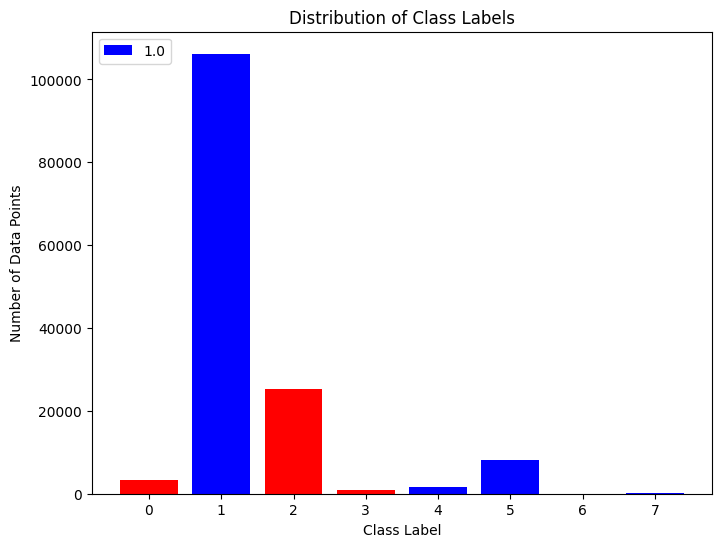

In [ ]:

# Count occurrences of each class
class_counts = Y.value_counts()

# Define colors for each class
colors = ['blue', 'red']  # Adjust colors as needed

# Create the plot
plt.figure(figsize=(8, 6))  # Adjust figure size as needed

plt.bar(class_counts.index, class_counts.values, color=colors)
plt.xlabel("Class Label")
plt.ylabel("Number of Data Points")
plt.title("Distribution of Class Labels")

# Add a legend if needed
plt.legend(class_counts.index, loc='upper left')

plt.show()


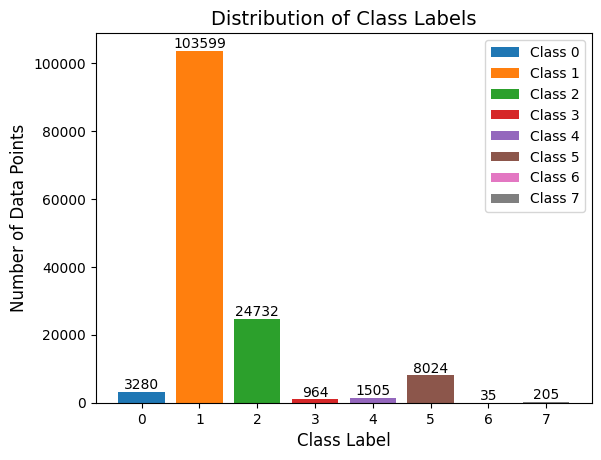

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count occurrences of each class
class_counts = data['label'].value_counts().sort_index()

# Define a color palette with as many colors as there are classes
# 'tab10' is good for up to 10 classes
colors = sns.color_palette('tab10', n_colors=class_counts.nunique())

# Create the plot
# plt.figure(figsize=(10, 6))  # Adjust figure size as needed
bars = plt.bar(class_counts.index, class_counts.values, color=colors)

# Add labels and title
plt.xlabel("Class Label", fontsize=12)
plt.ylabel("Number of Data Points", fontsize=12)
plt.title("Distribution of Class Labels", fontsize=14)

# Add legend for each class
plt.legend(bars, [f'Class {i}' for i in class_counts.index], loc='upper right')

# Add count labels above the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 5, int(yval),
             ha='center', va='bottom', fontsize=10)

plt.savefig("Distribution_Class_plot.eps", format='eps', bbox_inches='tight')
plt.show()



In [22]:
# Check class imbalance
print(Y.value_counts())

label
1    103599
2     24732
5      8024
0      3280
4      1505
3       964
7       205
6        35
Name: count, dtype: int64


In [ ]:
Y = Y[Y.notna()]

In [23]:
print(Y.isna().sum())


0


In [24]:
from imblearn.over_sampling import KMeansSMOTE
from sklearn.cluster import KMeans

# Adjusting KMeans
kmeans_estimator = KMeans(n_clusters=20, n_init=3, random_state=42)

# Adjusting KMeansSMOTE
kmeans_smote = KMeansSMOTE(
    sampling_strategy='not majority',
    random_state=42,
    kmeans_estimator=kmeans_estimator,
    cluster_balance_threshold=0.001
)

# Resampling
X_resampled, Y_resampled = kmeans_smote.fit_resample(X, Y)


In [ ]:
import numpy as np
from google.colab import files

# Saving the resampled data
np.save('X_resampled.npy', X_resampled)
np.save('Y_resampled.npy', Y_resampled)




In [ ]:

# Loading the resampled data
X_loaded = np.load('X_resampled.npy')
Y_loaded = np.load('Y_resampled.npy')

# Verify the data
print("X_loaded shape:", X_loaded.shape)
print("Y_loaded shape:", Y_loaded.shape)

X_loaded shape: (828827, 46)
Y_loaded shape: (828827,)


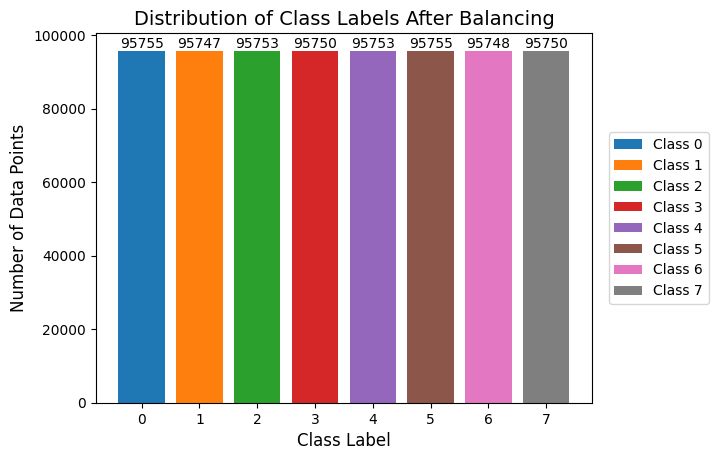

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# Count occurrences of each class in the resampled data
class_counts = Counter(Y_resampled)

# Sort the class counts by class label
class_counts = dict(sorted(class_counts.items()))

# Define a color palette with as many colors as there are classes
colors = sns.color_palette('tab10', n_colors=len(class_counts))

# Create the plot
# plt.figure(figsize=(10, 6))  # Adjust figure size as needed
bars = plt.bar(class_counts.keys(), class_counts.values(), color=colors)

# Add labels and title
plt.xlabel("Class Label", fontsize=12)
plt.ylabel("Number of Data Points", fontsize=12)
plt.title("Distribution of Class Labels After Balancing", fontsize=14)

# Add legend for each class
plt.legend(bars, [f'Class {i}' for i in class_counts.keys()],
           loc='center left', bbox_to_anchor=(1.02, 0.5), fontsize=10)
# Add count labels above the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 5, int(yval),
             ha='center', va='bottom', fontsize=10)

plt.savefig("Balanced_Distribution_Class_plot.eps", format='eps', bbox_inches='tight')
plt.show()


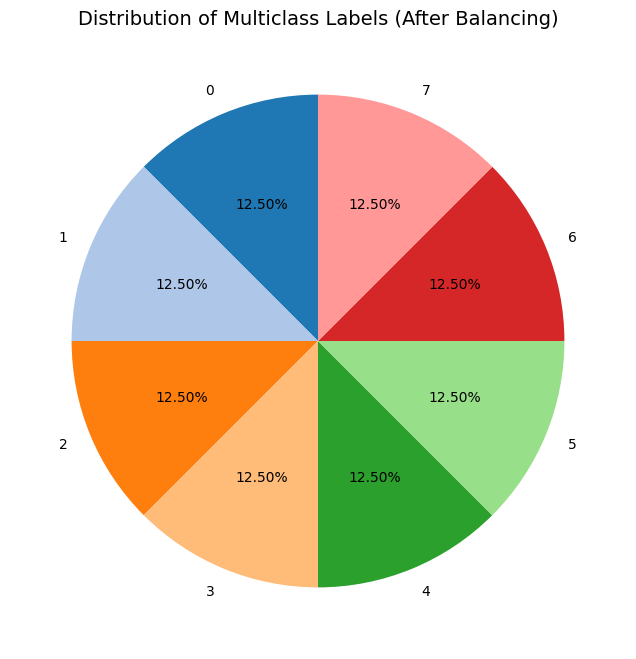

In [ ]:
import matplotlib.pyplot as plt

# Count occurrences of each class in Y_resampled
class_counts = pd.Series(Y_resampled).value_counts().sort_index()

# Plotting the pie chart
plt.figure(figsize=(8, 8))  # Adjust figure size if needed
plt.pie(
    class_counts,
    labels=class_counts.index,
    autopct="%.2f%%",
    startangle=90,
    colors=plt.cm.tab20.colors  # Color palette for multiclass
)

# Add a title
plt.title("Distribution of Multiclass Labels (After Balancing)", fontsize=14)

# Save the figure in EPS format
plt.savefig("balanced_multiclass_plot.eps", format='eps', bbox_inches='tight')

# Display the plot
plt.show()


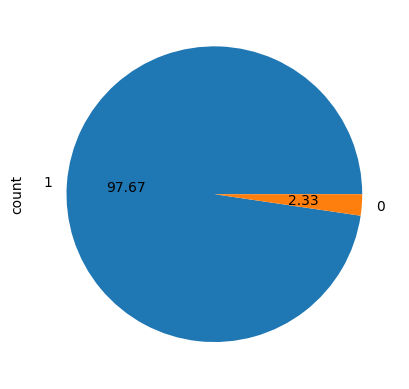

In [ ]:
Y.value_counts().plot.pie(autopct="%.2f")

# Save the figure in EPS format
plt.savefig("unbalanced_plot.eps", format='eps', bbox_inches='tight')

# Display the plot (optional)
plt.show()

In [ ]:
from imblearn.over_sampling import KMeansSMOTE
from sklearn.cluster import KMeans

# Initialize KMeans estimator with explicit n_init value
kmeans_estimator = KMeans(n_init=3)

# Initialize KMeansSMOTE object with the specified KMeans estimator
kmeans_smote = KMeansSMOTE(sampling_strategy='auto', random_state=42, kmeans_estimator=kmeans_estimator)

# Apply KMeansSMOTE to oversample the minority class
X_resampled, Y_resampled = kmeans_smote.fit_resample(X, Y)


In [ ]:

print(Y_resampled.value_counts())

label
0    1285925
1    1285922
Name: count, dtype: int64


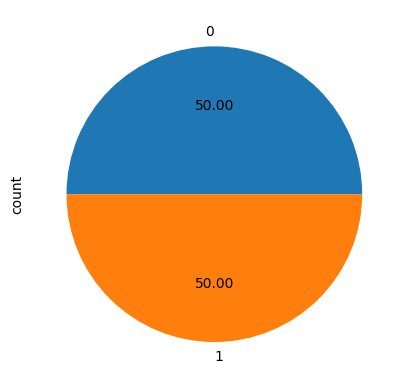

In [ ]:
Y_resampled.value_counts().plot.pie(autopct="%.2f")
# Save the figure in EPS format
plt.savefig("balanced_plot.eps", format='eps', bbox_inches='tight')

# Display the plot (optional)
plt.show()

In [25]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
scalar = StandardScaler()
X_scaled = scalar.fit_transform(X_resampled)


In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X_resampled,Y_resampled,test_size=0.2,random_state=42)

print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(663061, 46)
(165766, 46)
(663061,)
(165766,)


# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

logistic_regression_model = LogisticRegression(n_jobs=-1)
logistic_regression_model.fit(X_train, Y_train)
Y_pred_lr = logistic_regression_model.predict(X_test)


In [ ]:
from sklearn.linear_model import LogisticRegression

# Multinomial strategy is more effective for multiclass classification
logistic_regression_model = LogisticRegression(multi_class='multinomial', solver='lbfgs', n_jobs=-1, max_iter=1000)
logistic_regression_model.fit(X_train, Y_train)
Y_pred_lr = logistic_regression_model.predict(X_test)


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


# Model Evaluation

In [ ]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

# Evaluate the model
print("Accuracy:", accuracy_score(Y_test, Y_pred_lr))
print("Recall:", recall_score(Y_test, Y_pred_lr, average='macro'))
print("Precision:", precision_score(Y_test, Y_pred_lr, average='macro'))
print("F1 Score:", f1_score(Y_test, Y_pred_lr, average='macro'))

Accuracy: 0.26718386158802165
Recall: 0.26814267445393536
Precision: 0.3204976272224507
F1 Score: 0.167799356431579


In [ ]:
from sklearn.metrics import classification_report

print(classification_report(Y_test,Y_pred_lr))

              precision    recall  f1-score   support

           0       0.47      0.16      0.24     20785
           1       0.14      0.00      0.01     20718
           2       0.50      0.01      0.03     20732
           3       0.19      0.93      0.31     20569
           4       0.39      0.92      0.55     20681
           5       0.37      0.07      0.12     20841
           6       0.52      0.05      0.09     20705
           7       0.00      0.00      0.00     20735

    accuracy                           0.27    165766
   macro avg       0.32      0.27      0.17    165766
weighted avg       0.32      0.27      0.17    165766



# Confusion Matrix

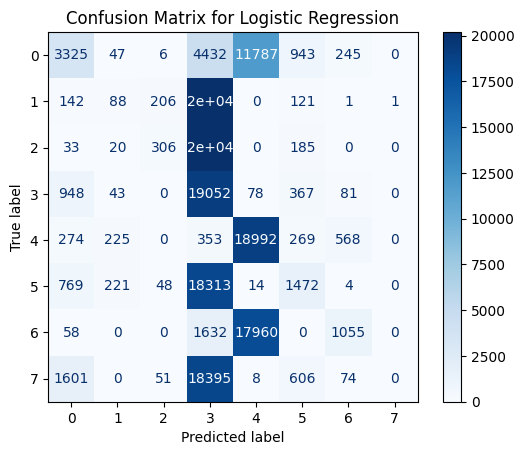

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(Y_test, Y_pred_lr, labels=logistic_regression_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=logistic_regression_model.classes_)
disp.plot(cmap='Blues')  # You can customize the color map
plt.title("Confusion Matrix for Logistic Regression")

plt.savefig("confusion_matrix_logisticRegression.eps", format='eps', bbox_inches='tight')

plt.show()


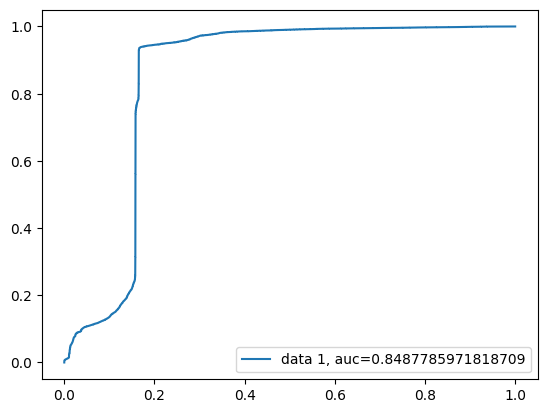

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

y_pred_proba = logistic_regression_model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(Y_test, y_pred_proba)
auc = roc_auc_score(Y_test, y_pred_proba)

plt.plot(fpr, tpr, label="data 1, auc="+str(auc))
plt.legend(loc=4)

plt.savefig("ROCcurve_logisticRegression.eps", format='eps', bbox_inches='tight')

plt.show()

# plotting the ROC curve and calculating AUC score
# 0(worst) to 1(best) -> 0.98 score


# Creating a Mesh Grid from 2 features

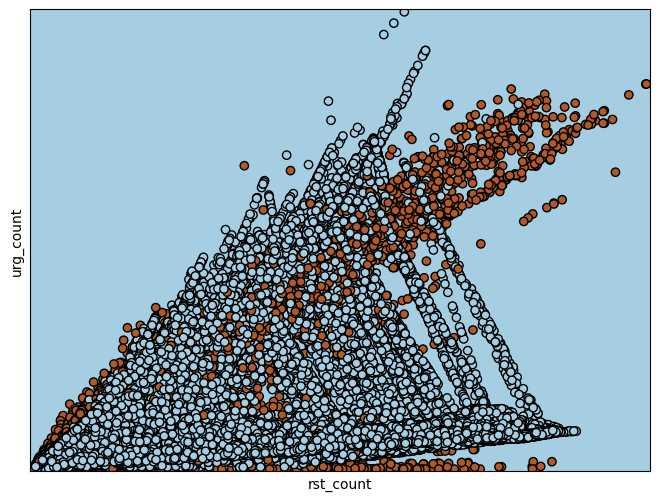

In [ ]:
import matplotlib.pyplot as plt
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Assuming X_ros and Y_ros are your feature matrix and target variable
X_train, X_test, Y_train, Y_test = train_test_split(X_ros, Y_ros, test_size=0.2, random_state=42)

# Create an instance of Logistic Regression Classifier and fit the data
logistic_regression_model = LogisticRegression(n_jobs=-1)
logistic_regression_model.fit(X_train[['rst_count', 'urg_count']], Y_train)

# Create a scatter plot with decision boundary
plt.figure(figsize=(8, 6))

# Plot decision boundary
DecisionBoundaryDisplay.from_estimator(
    logistic_regression_model,
    X_train[['rst_count', 'urg_count']],  # Use Telnet on the x-axis and Tot size on the y-axis
    cmap=plt.cm.Paired,
    ax=plt.gca(),
    response_method="predict",
    plot_method="pcolormesh",
    shading="auto",
    xlabel="rst_count",
    ylabel="urg_count",
    eps=0.5,
)

# Plot training points
plt.scatter(X_train['rst_count'], X_train['urg_count'], c=Y_train, edgecolors="k", cmap=plt.cm.Paired)

plt.xticks(())
plt.yticks(())

plt.show()


# Feature Importance Graph from Random Forest

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(960829, 46)
(240208, 46)
(960829,)
(240208,)


# XGBoost

In [ ]:
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

# Split the data into train and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X_resampled, Y_resampled, test_size=0.2, random_state=42)

print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(663061, 46)
(165766, 46)
(663061,)
(165766,)


In [ ]:
# Initialize and train the XGBoost classifier
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', n_jobs=-1, random_state=42)
xgb_model.fit(X_train, Y_train)

# Make predictions
Y_pred_xgb = xgb_model.predict(X_test)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [16:35:31] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [ ]:
# Evaluate the model
print("Accuracy:", accuracy_score(Y_test, Y_pred_xgb))
print("Recall:", recall_score(Y_test, Y_pred_xgb, average='macro'))
print("Precision:", precision_score(Y_test, Y_pred_xgb, average='macro'))
print("F1 Score:", f1_score(Y_test, Y_pred_xgb, average='macro'))

Accuracy: 0.9993146348309107
Recall: 0.9993143207230318
Precision: 0.9993150778199279
F1 Score: 0.9993142218098273


In [ ]:
from sklearn.metrics import classification_report

print(classification_report(Y_test,Y_pred_xgb))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     20785
           1       1.00      1.00      1.00     20718
           2       1.00      1.00      1.00     20732
           3       1.00      1.00      1.00     20569
           4       1.00      1.00      1.00     20681
           5       1.00      1.00      1.00     20841
           6       1.00      1.00      1.00     20705
           7       1.00      1.00      1.00     20735

    accuracy                           1.00    165766
   macro avg       1.00      1.00      1.00    165766
weighted avg       1.00      1.00      1.00    165766



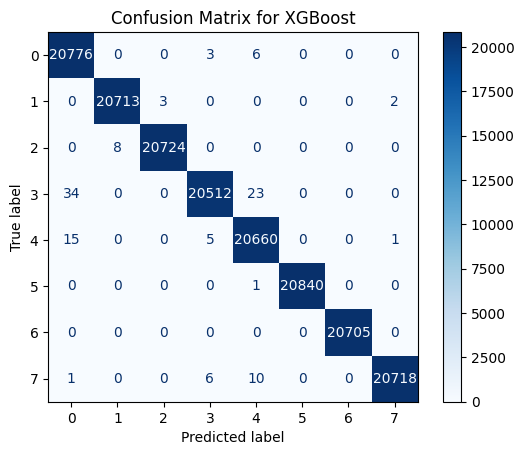

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Compute the confusion matrix
cm = confusion_matrix(Y_test, Y_pred_xgb, labels=xgb_model.classes_)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=xgb_model.classes_)
disp.plot(cmap='Blues')  # You can customize the color map
plt.title("Confusion Matrix for XGBoost")

plt.savefig("confusion_matrix_XGBoost.eps", format='eps', bbox_inches='tight')

plt.show()


In [27]:
pip install shap


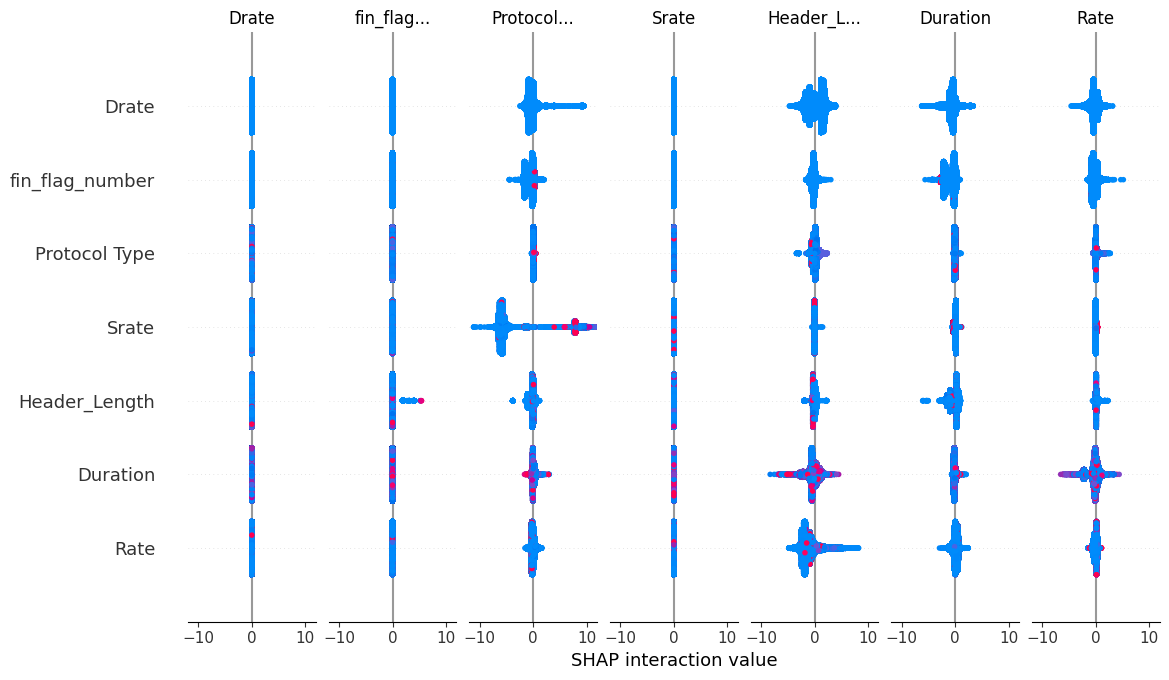

In [ ]:
import shap

# Create a TreeExplainer object for your model
explainer = shap.TreeExplainer(xgb_model)

# Compute SHAP values for the test set (or a sample of it)
shap_values = explainer.shap_values(X_test)

# Summary plot: Visualizes the impact of features on model output
shap.summary_plot(shap_values, X_test)





In [ ]:
import shap
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assuming xgb_model is your trained XGBoost model and X_train, X_test are your data splits.

# Choose a background dataset for the SHAP explainer.
# Here we use a random sample of 100 instances from X_train.
background = X_train.sample(n=100, random_state=42)

# Create the SHAP explainer using the background dataset.
explainer = shap.Explainer(xgb_model, background)

# Compute SHAP values for the instances you want to explain.
# You can use X_test or X_train depending on your needs.
shap_values = explainer(X_test)

# Optionally, if you want to display more user-friendly feature values (e.g., with strings)
# you can set the display_data attribute. For example:
# shap_values.display_data = X_test.values

# ------------------------------------------------------------------------------
# Global feature importance: Mean absolute SHAP value (default)
print("Bar plot with mean absolute SHAP values:")
shap.plots.bar(shap_values)
plt.show()

# ------------------------------------------------------------------------------
# Global feature importance: Maximum absolute SHAP value
print("Bar plot with maximum absolute SHAP values:")
shap.plots.bar(shap_values.abs.max(0))
plt.show()

# ------------------------------------------------------------------------------
# Beeswarm plot: Shows the distribution of SHAP values for each feature
print("Beeswarm plot for SHAP values:")
shap.plots.beeswarm(shap_values)
plt.show()


  5%|=                   | 55630/1225624 [31:15<657:14]       

# Support Vector Machine SVM

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Split the data into train and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X_resampled, Y_resampled, test_size=0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(960829, 46)
(240208, 46)
(960829,)
(240208,)


In [ ]:
# Initialize and train the SVM classifier
svm_model = SVC(kernel='linear', random_state=42)  # You can try other kernels like 'rbf', 'poly', etc.
svm_model.fit(X_train, Y_train)

# Make predictions
Y_pred = svm_model.predict(X_test)

# Gradient Boosting Machine

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Split the data into train and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X_resampled, Y_resampled, test_size=0.2, random_state=42)

print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

# Initialize and train the GBM classifier
gbm_model = GradientBoostingClassifier(random_state=42)
gbm_model.fit(X_train, Y_train)

# Make predictions
Y_pred_gbm = gbm_model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(Y_test, Y_pred_gbm))
print("Recall:", recall_score(Y_test, Y_pred_gbm, average='macro'))
print("Precision:", precision_score(Y_test, Y_pred_gbm, average='macro'))
print("F1 Score:", f1_score(Y_test, Y_pred_gbm, average='macro'))



(663061, 46)
(165766, 46)
(663061,)
(165766,)


KeyboardInterrupt: 

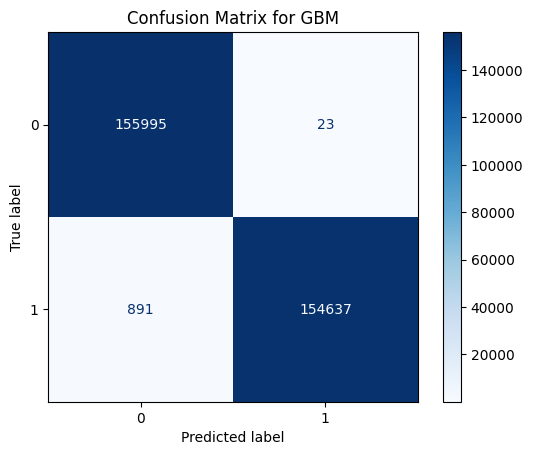

In [ ]:
# Confusion Matrix
cm = confusion_matrix(Y_test, Y_pred_gbm, labels=gbm_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=gbm_model.classes_)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix for GBM")

plt.savefig("confusion_matrix_GradientBoostingMachine.eps", format='eps', bbox_inches='tight')

plt.show()


# RandomForest

In [28]:
from sklearn.ensemble import RandomForestClassifier




# Random Forest model
rf_model = RandomForestClassifier(n_estimators=50, random_state=42, n_jobs=-1)
rf_model.fit(X_train, Y_train)


RandomForestClassifier(n_estimators=50, n_jobs=-1, random_state=42)

In [29]:
# Make predictions on the test set
Y_pred_rf = rf_model.predict(X_test)




In [ ]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

# Evaluate the model
print("Accuracy:", accuracy_score(Y_test, Y_pred_rf))
print("Recall:", recall_score(Y_test, Y_pred_rf, average='macro'))
print("Precision:", precision_score(Y_test, Y_pred_rf, average='macro'))
print("F1 Score:", f1_score(Y_test, Y_pred_rf, average='macro'))

Accuracy: 0.9992819983942873
Recall: 0.9992816314308253
Precision: 0.9992835255674282
F1 Score: 0.9992816794168676


In [ ]:
from sklearn.metrics import classification_report

# Print classification report for more detailed metrics
print("Classification Report:")
print(classification_report(Y_test, Y_pred_rf))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     20785
           1       1.00      1.00      1.00     20718
           2       1.00      1.00      1.00     20732
           3       1.00      1.00      1.00     20569
           4       1.00      1.00      1.00     20681
           5       1.00      1.00      1.00     20841
           6       1.00      1.00      1.00     20705
           7       1.00      1.00      1.00     20735

    accuracy                           1.00    165766
   macro avg       1.00      1.00      1.00    165766
weighted avg       1.00      1.00      1.00    165766



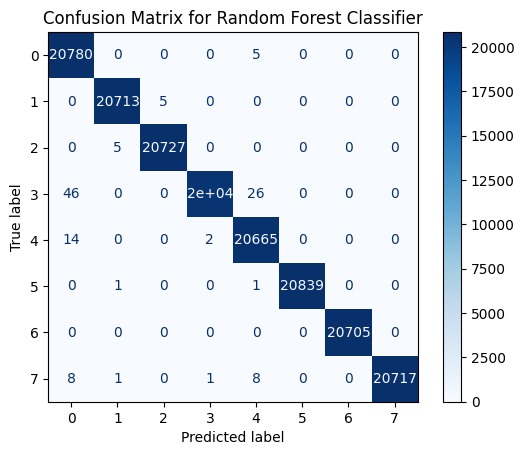

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm_rf = confusion_matrix(Y_test, Y_pred_rf, labels=rf_model.classes_)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=rf_model.classes_)
disp_rf.plot(cmap='Blues')
plt.title("Confusion Matrix for Random Forest Classifier")
plt.savefig("confusion_matrix_RandomForest.eps", format='eps', bbox_inches='tight')

plt.show()


In [ ]:
!pip install shap

100%|===================| 7990/8000 [05:37<00:00]       

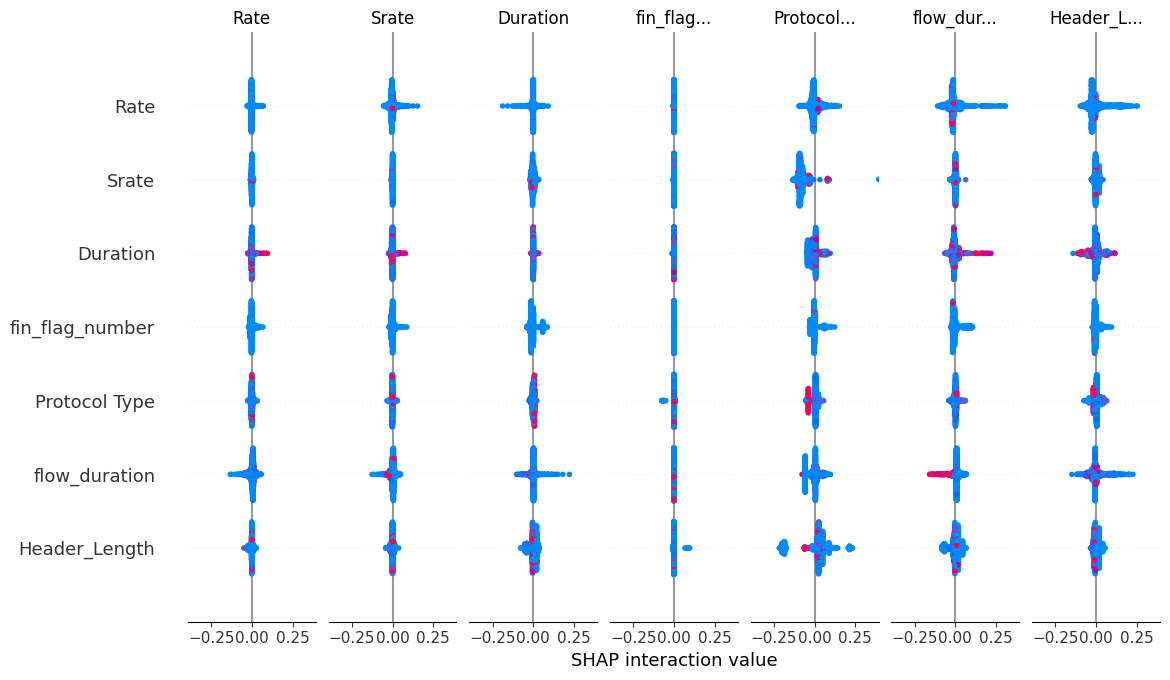

In [30]:
import shap
import matplotlib.pyplot as plt

# Initialize JS visualization
shap.initjs()

# Define a background sample from training data
background = X_train.sample(n=100, random_state=42)

# Create the explainer using your RandomForest model
explainer = shap.TreeExplainer(rf_model, background)

# Instead of using the full X_test, sample a manageable number of rows (e.g., 1000)
X_test_sample = X_test.sample(n=1000, random_state=42)

# Compute SHAP values on the sample
shap_values = explainer.shap_values(X_test_sample)

# Now you can visualize the SHAP values
shap.summary_plot(shap_values, X_test_sample)
plt.show()


In [49]:
import shap
import matplotlib.pyplot as plt

# Initialize JS visualization
shap.initjs()

# Define a background sample from training data
background = X_train.sample(n=100, random_state=42)

# Create the explainer using your RandomForest model
explainer = shap.Explainer(rf_model, background)

# Instead of using the full X_test, sample a manageable number of rows (e.g., 1000)
X_test_sample = X_test.sample(n=1000, random_state=42)

# Compute SHAP values on the sample
shap_values = explainer(X_test_sample)

# Now you can visualize the SHAP values
# shap.summary_plot(shap_values, X_test_sample)
# plt.show()


100%|===================| 7976/8000 [05:42<00:01]       

In [55]:
print(type(shap_values))
if isinstance(shap_values, list):
    for i, sv in enumerate(shap_values):
        print(f"Class {i}: {sv.shape}")
else:
    print(shap_values.shape)


<class 'shap._explanation.Explanation'>
(1000, 46, 8)


Variable Importance Plot - Global Interpretation


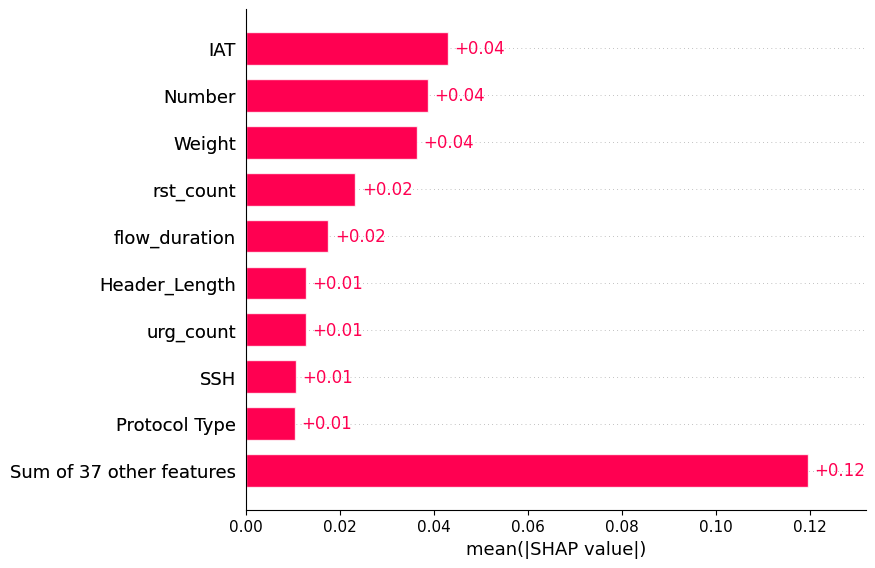

In [56]:
print("Variable Importance Plot - Global Interpretation")
# figure = plt.figure()
# Plotting feature importance for Class 0
shap.plots.bar(shap.Explanation(values=shap_values.values[:, :, 0], feature_names=X_test.columns))

plt.show()

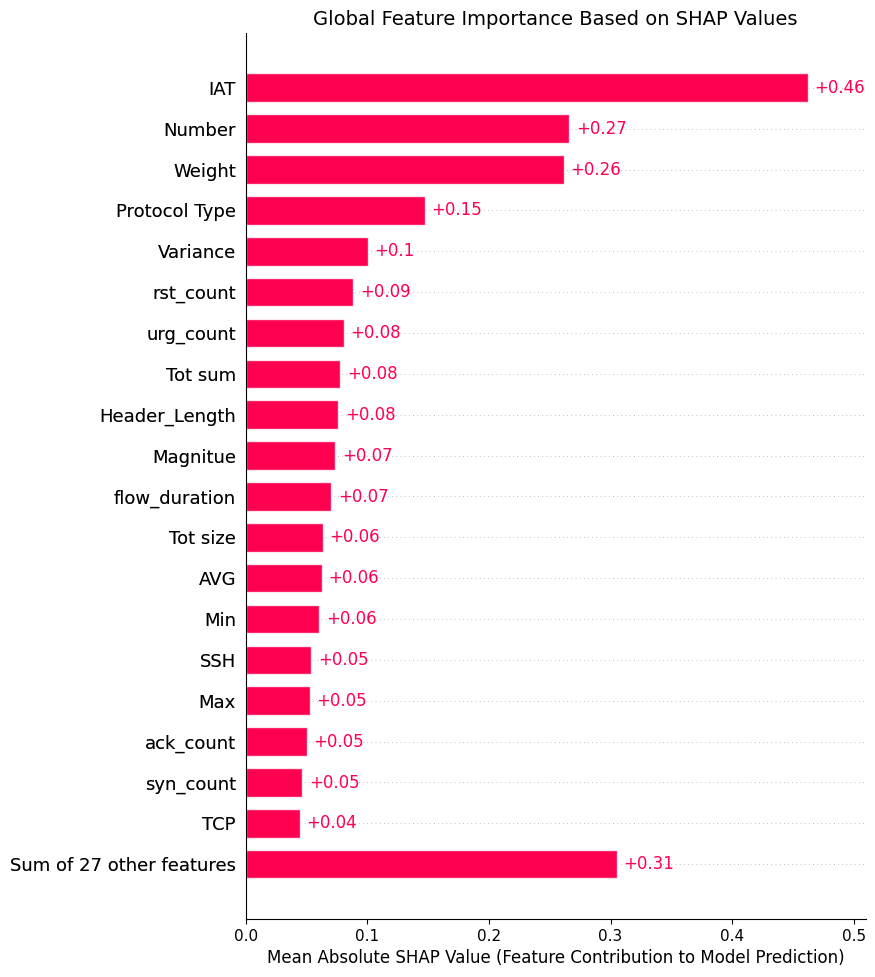

In [65]:
import numpy as np

# Sum of absolute SHAP values across all classes
global_shap_values = np.abs(shap_values.values).sum(axis=2)

# Plot global feature importance
# Plot global feature importance
shap.plots.bar(
    shap.Explanation(values=global_shap_values, feature_names=X_test.columns),
    max_display=20,
    show=False
)

# Add descriptive title and x-axis label
plt.title("Global Feature Importance Based on SHAP Values", fontsize=14)
plt.xlabel("Mean Absolute SHAP Value (Feature Contribution to Model Prediction)", fontsize=12)

plt.savefig("shap_variable_importance.eps", format='eps', bbox_inches='tight')

plt.show()

# Comparison of Random Forest, Gradient Boosting, XGBoost, Logistic Regression

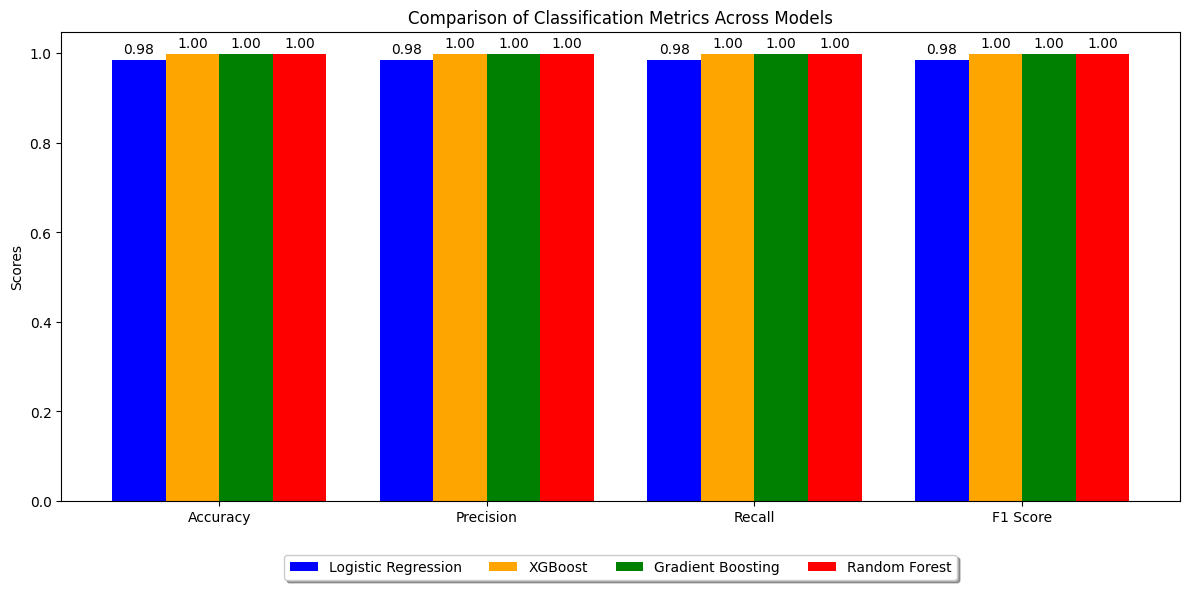

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

# Dictionary to store metrics for all models
results = {}

# Logistic Regression
lr_metrics = {
    "Accuracy": accuracy_score(Y_test, Y_pred_lr),
    "Precision": precision_score(Y_test, Y_pred_lr, average='macro'),
    "Recall": recall_score(Y_test, Y_pred_lr, average='macro'),
    "F1 Score": f1_score(Y_test, Y_pred_lr, average='macro')
}
results["Logistic Regression"] = lr_metrics

# XGBoost
xgb_metrics = {
    "Accuracy": accuracy_score(Y_test, Y_pred_xgb),
    "Precision": precision_score(Y_test, Y_pred_xgb, average='macro'),
    "Recall": recall_score(Y_test, Y_pred_xgb, average='macro'),
    "F1 Score": f1_score(Y_test, Y_pred_xgb, average='macro')
}
results["XGBoost"] = xgb_metrics

# Gradient Boosting (GBM)
gbm_metrics = {
    "Accuracy": accuracy_score(Y_test, Y_pred_gbm),
    "Precision": precision_score(Y_test, Y_pred_gbm, average='macro'),
    "Recall": recall_score(Y_test, Y_pred_gbm, average='macro'),
    "F1 Score": f1_score(Y_test, Y_pred_gbm, average='macro')
}
results["Gradient Boosting"] = gbm_metrics

# Random Forest
rf_metrics = {
    "Accuracy": accuracy_score(Y_test, Y_pred_rf),
    "Precision": precision_score(Y_test, Y_pred_rf, average='macro'),
    "Recall": recall_score(Y_test, Y_pred_rf, average='macro'),
    "F1 Score": f1_score(Y_test, Y_pred_rf, average='macro')
}
results["Random Forest"] = rf_metrics

# Create a bar chart to compare metrics across models
metrics = ["Accuracy", "Precision", "Recall", "F1 Score"]
x = np.arange(len(metrics))  # x-axis positions

# Extract metric values for each model
lr_values = [lr_metrics[metric] for metric in metrics]
xgb_values = [xgb_metrics[metric] for metric in metrics]
gbm_values = [gbm_metrics[metric] for metric in metrics]
rf_values = [rf_metrics[metric] for metric in metrics]

# Bar chart settings
width = 0.2  # Width of the bars
fig, ax = plt.subplots(figsize=(12, 6))

# Plot bars for each model
bars1 = ax.bar(x - 1.5 * width, lr_values, width, label="Logistic Regression", color="blue")
bars2 = ax.bar(x - 0.5 * width, xgb_values, width, label="XGBoost", color="orange")
bars3 = ax.bar(x + 0.5 * width, gbm_values, width, label="Gradient Boosting", color="green")
bars4 = ax.bar(x + 1.5 * width, rf_values, width, label="Random Forest", color="red")

# Add labels, title, and legend
ax.set_ylabel("Scores")
ax.set_title("Comparison of Classification Metrics Across Models")
ax.set_xticks(x)
ax.set_xticklabels(metrics)

# Move the legend outside the plot
ax.legend(loc="upper center", bbox_to_anchor=(0.5, -0.1), fancybox=True, shadow=True, ncol=4)

# Annotate bars with metric values
for bars in [bars1, bars2, bars3, bars4]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # Offset text by 3 points
                    textcoords="offset points",
                    ha='center', va='bottom')

plt.tight_layout()

plt.savefig("ComparisonResults.eps", format='eps', bbox_inches='tight')

plt.show()



# Mesh Daigram for 2 features of Random Forest

In [ ]:
X_train_new = X_train[["urg_count", "rst_count"]]
X_test_new=X_test[["urg_count", "rst_count"]]

In [ ]:
X_train_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1036940 entries, 487892 to 121958
Data columns (total 2 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   urg_count  1036940 non-null  float64
 1   rst_count  1036940 non-null  float64
dtypes: float64(2)
memory usage: 23.7 MB


In [ ]:
Y_train.info()

<class 'pandas.core.series.Series'>
Index: 1036940 entries, 487892 to 121958
Series name: label
Non-Null Count    Dtype
--------------    -----
1036940 non-null  int64
dtypes: int64(1)
memory usage: 15.8 MB


In [ ]:
from sklearn.ensemble import RandomForestClassifier




# Random Forest model
rf_model_new = RandomForestClassifier(n_estimators=50, random_state=42, n_jobs=-1)
rf_model_new.fit(X_train_new, Y_train)


RandomForestClassifier(n_estimators=50, n_jobs=-1, random_state=42)

In [ ]:
# Make predictions on the test set
Y_pred_rf_new = rf_model_new.predict(X_test_new)




In [ ]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

# Evaluate the model
print("Accuracy:", accuracy_score(Y_test, Y_pred_rf_new))
print("Recall:", recall_score(Y_test, Y_pred_rf_new, average='macro'))
print("Precision:", precision_score(Y_test, Y_pred_rf_new, average='macro'))
print("F1 Score:", f1_score(Y_test, Y_pred_rf_new, average='macro'))

Accuracy: 0.8343202113912087
Recall: 0.8345257521979936
Precision: 0.8654788073225483
F1 Score: 0.8307716589905931


In [ ]:
print(X_train_new["urg_count"].max())
print(X_train_new["urg_count"].min())
print(X_train_new["rst_count"].max())
print(X_train_new["rst_count"].min())

3855.6
0.0
8978.5
0.0


In [ ]:
# define bounds of the domain
min_urg, max_urg = X_train_new["urg_count"].min() - 1, X_train_new["urg_count"].max() + 1
min_rst, max_rst = X_train_new["rst_count"].min() - 1, X_train_new["rst_count"].max() + 1

print(f"Minimum 'urg_count': {min_urg}, Maximum 'urg_count': {max_urg}")
print(f"Minimum 'rst_count': {min_rst}, Maximum 'rst_count': {max_rst}")

Minimum 'urg_count': -1.0, Maximum 'urg_count': 3856.6
Minimum 'rst_count': -1.0, Maximum 'rst_count': 8979.5


In [ ]:
import numpy as np

# Assuming min_rst, max_rst, min_urg, max_urg are previously defined
x1grid = np.arange(min_urg, max_urg, 0.5)
x2grid = np.arange(min_rst, max_rst, 0.5)


In [ ]:
# create all of the lines and rows of the grid
xx, yy = np.meshgrid(x1grid, x2grid)

In [ ]:
# flatten each grid to a vector
r1, r2 = xx.flatten(), yy.flatten()
r1, r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1))

In [ ]:
# horizontal stack vectors to create x1,x2 input for the model
grid = np.hstack((r1, r2))

In [ ]:
# make predictions for the grid
Y_pred_rf_new = rf_model_new.predict(grid)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(



The warning you're seeing is related to the feature names of your dataset not being available, but the RandomForestClassifier was fitted with feature names during training. This warning is not an error and should not affect the predictions.

If you want to get rid of this warning, you can try providing the feature names when fitting the RandomForestClassifier. During training, you can set the feature_names parameter to the column names of your training data:

# Assuming X_train_new is a DataFrame with column names
rf_model_new.fit(X_train_new, y_train, feature_name=["urg_count", "rst_count"])

# Assuming X_train_new is a DataFrame with column names
rf_model_new.fit(X_train_new, y_train, feature_name=["urg_count", "rst_count"])
This way, the feature names will be associated with the model, and you might not see the warning during predictions. Keep in mind that this is more of a warning for informative purposes and doesn't impact the functionality of your code.

# Popular Features

In [ ]:
# Get feature importances
feature_importances = rf_model.feature_importances_

# Create a DataFrame to store feature names and importances
feature_importance_df_rf = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance values to get the most important features
feature_importance_df_rf = feature_importance_df_rf.sort_values(by='Importance', ascending=False)


Top 10 Important Features (Random Forest):
          Feature  Importance
40         Number    0.169992
39            IAT    0.169777
45         Weight    0.114187
17      urg_count    0.112781
18      rst_count    0.086065
0   flow_duration    0.051337
41       Magnitue    0.047586
36            AVG    0.031628
38       Tot size    0.031523
35            Max    0.028306


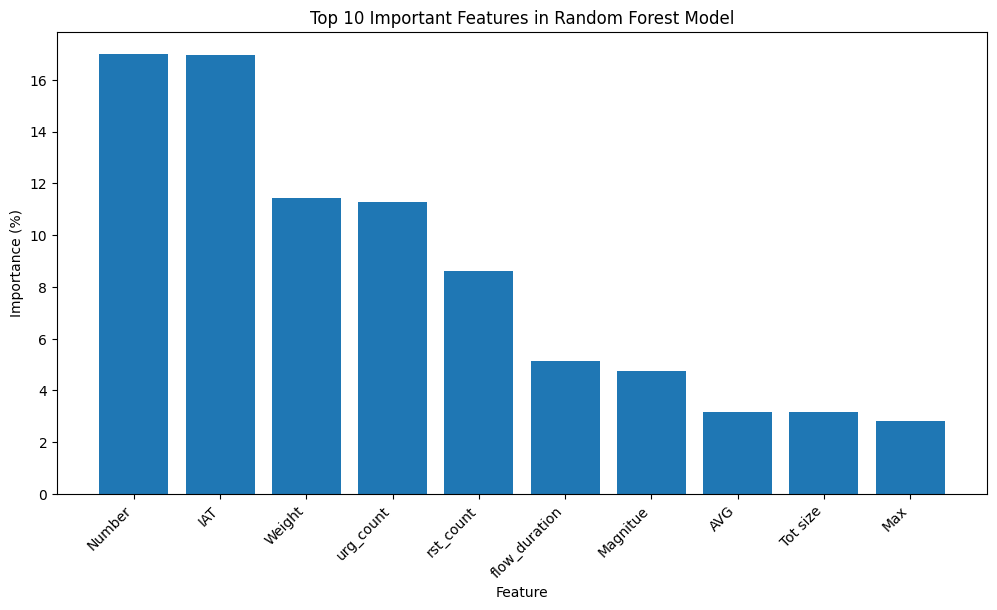

In [ ]:

# Print the top features
print("Top 10 Important Features (Random Forest):")
print(feature_importance_df_rf.head(10))

# Convert importance values to percentages
feature_importance_df_rf['Importance'] = feature_importance_df_rf['Importance'] * 100

# Plotting the feature importance
plt.figure(figsize=(12, 6))
plt.bar(feature_importance_df_rf['Feature'][:10], feature_importance_df_rf['Importance'][:10])
plt.xlabel('Feature')
plt.ylabel('Importance (%)')
plt.title('Top 10 Important Features in Random Forest Model')
plt.xticks(rotation=45, ha='right')
plt.savefig("ImportantFeatures.eps", format='eps', bbox_inches='tight')

plt.show()

# Applying to Identify DDOS Attacks
DDOS Anomaly is 1 and rest is 0

# **Isolation Forest**

In [ ]:
data.hist(figsize=(12,12))


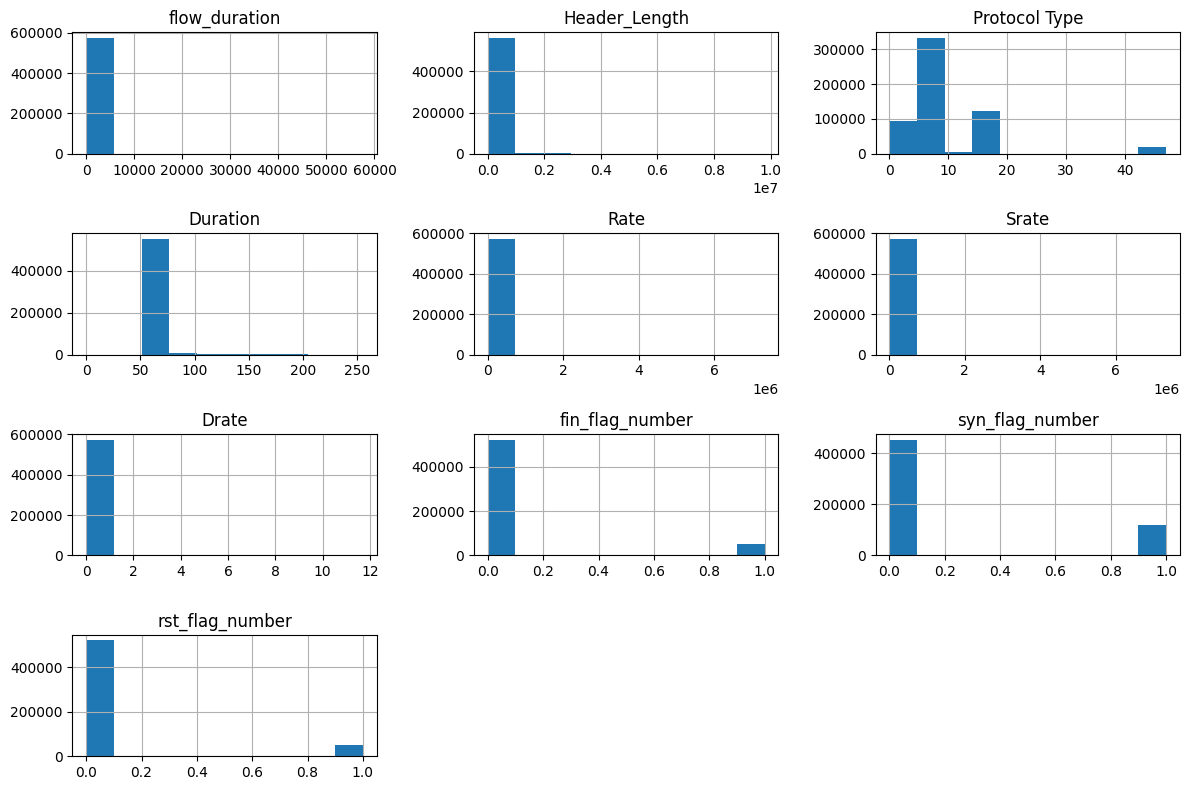

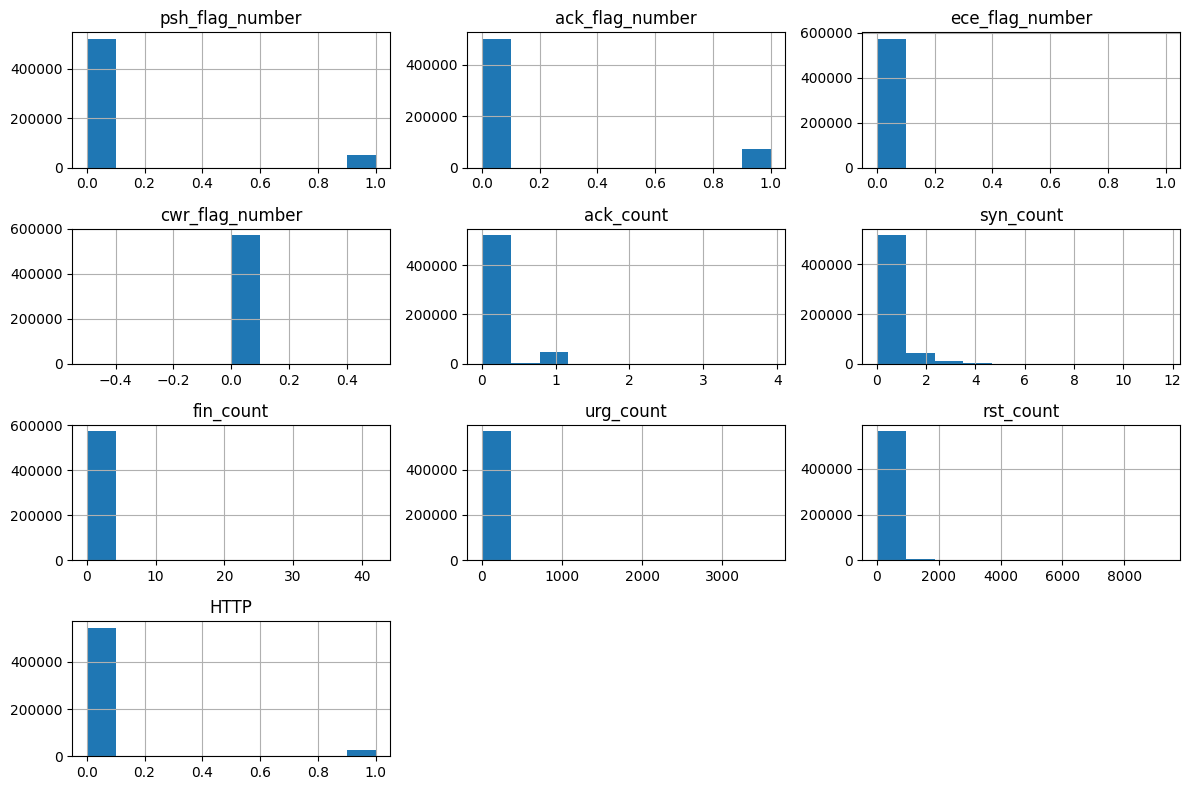

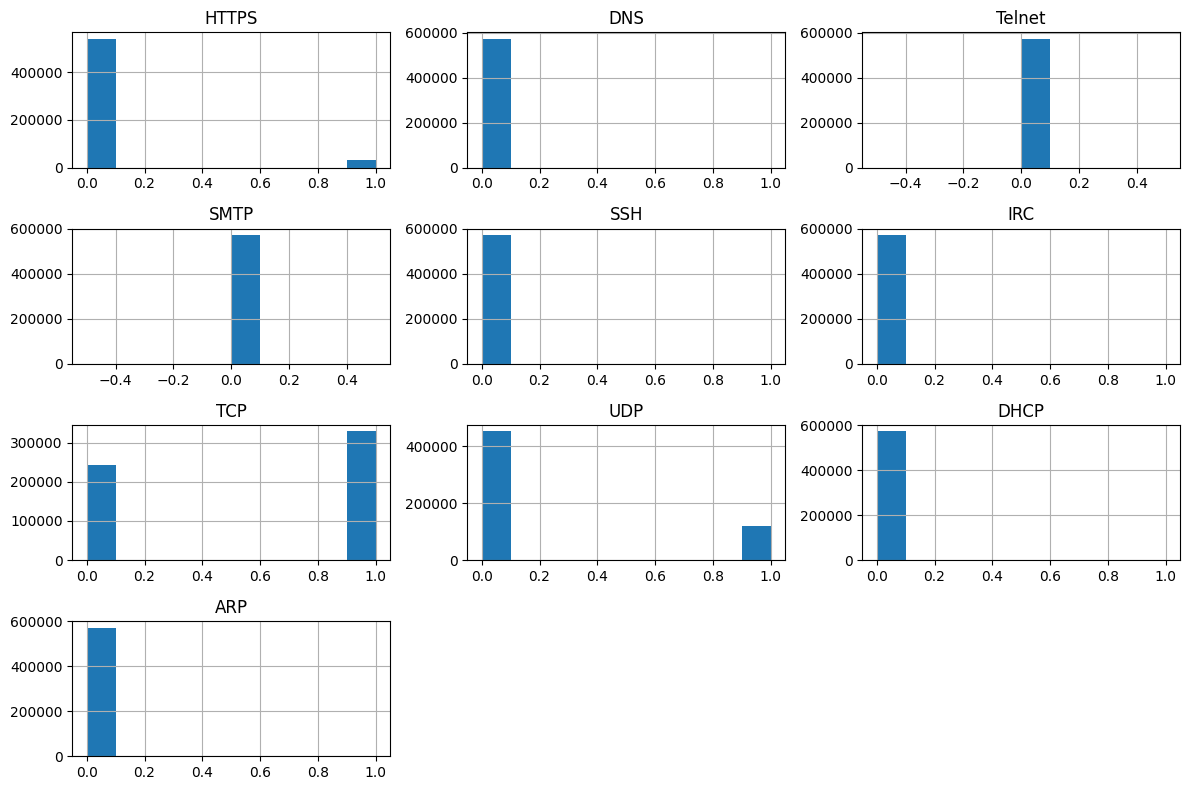

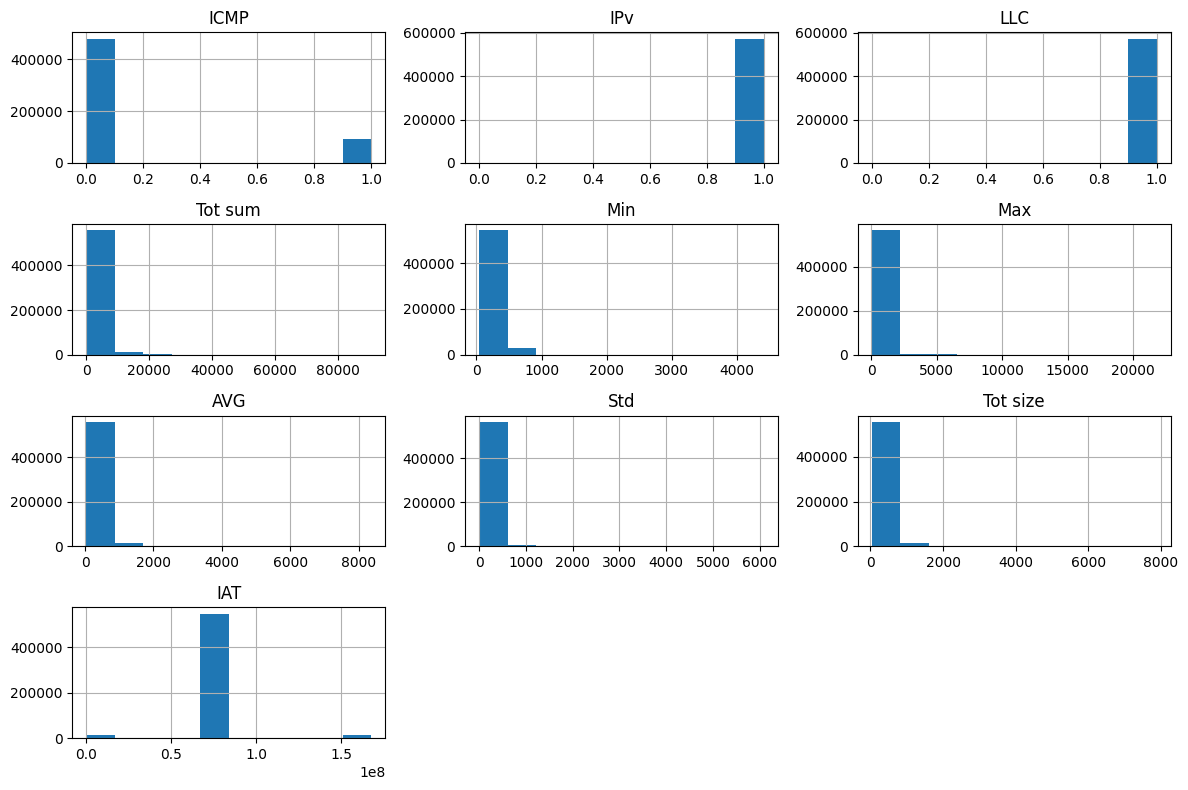

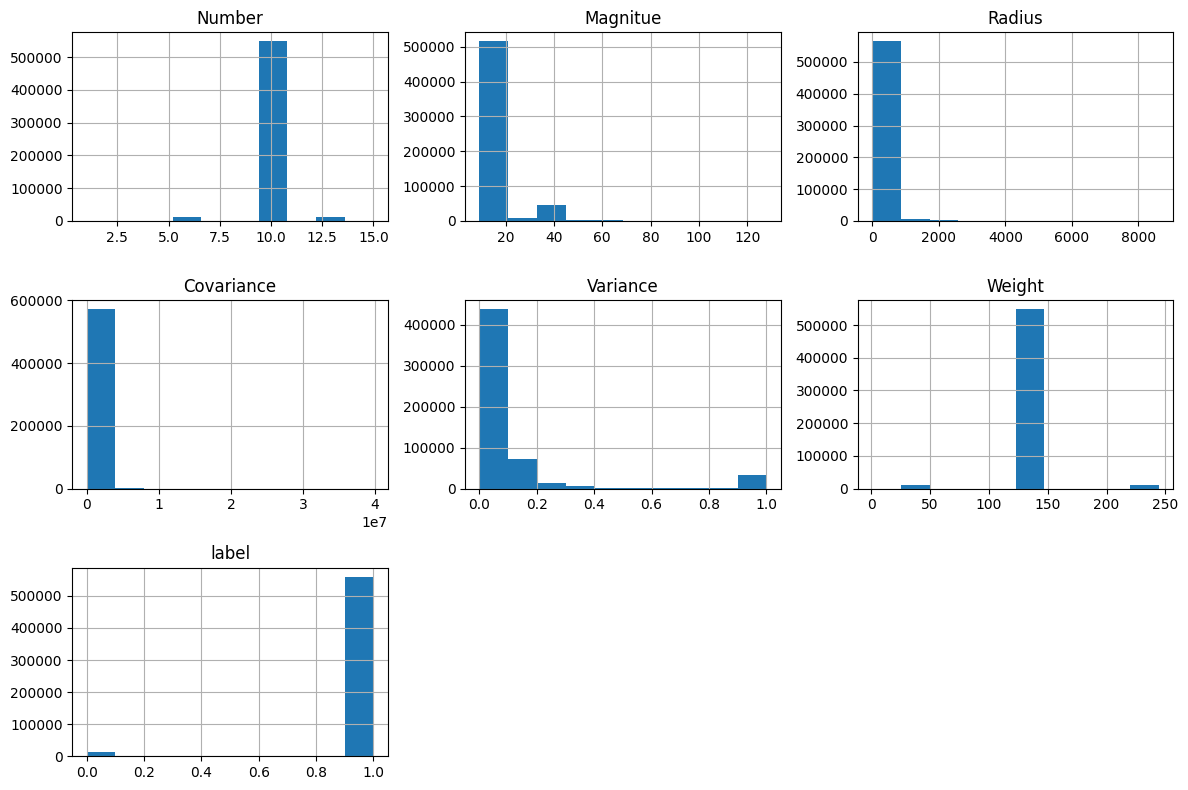

In [ ]:
import matplotlib.pyplot as plt

# Define the number of features to plot in each subset
features_per_subset = 10

# Calculate the number of subsets required
num_features = len(data.columns)
num_subsets = (num_features + features_per_subset - 1) // features_per_subset

# Plot histograms for each subset of features
for i in range(num_subsets):
    start_idx = i * features_per_subset
    end_idx = min((i + 1) * features_per_subset, num_features)

    subset_features = data.columns[start_idx:end_idx]
    data[subset_features].hist(figsize=(12, 8))
    plt.tight_layout()
    plt.show()


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(458328, 46)
(114582, 46)
(458328,)
(114582,)


In [ ]:
# Subset the dataset to include only the top 10 important features
top_features = ['urg_count', 'rst_count', 'IAT', 'Number', 'Weight',
                'Magnitue', 'Variance', 'flow_duration', 'AVG', 'Tot size']
X_subset = data[top_features]

# Split the subset dataset into training and testing sets
X_train_subset, X_test_subset, Y_train, Y_test = train_test_split(X_subset, Y, test_size=0.2, random_state=42)

print(X_train_subset.shape)
print(X_test_subset.shape)
print(Y_train.shape)
print(Y_test.shape)


(458328, 10)
(114582, 10)
(458328,)
(114582,)


In [ ]:
from sklearn.ensemble import IsolationForest

# Create an instance of the Isolation Forest model
isolation_forest = IsolationForest(max_samples=100, random_state=0)

# Train the Isolation Forest model on the training data
isolation_forest.fit(X_train)

# Predict anomalies on the testing data
y_pred_test = isolation_forest.predict(X_test)

# Convert predictions to 0s and 1s (1 for anomalies, -1 for normal instances)
y_pred_test = [1 if x == -1 else 0 for x in y_pred_test]

# Evaluate the model
from sklearn.metrics import classification_report, confusion_matrix

print("Confusion Matrix:")
print(confusion_matrix(Y_test, y_pred_test))

print("\nClassification Report:")
print(classification_report(Y_test, y_pred_test))


Confusion Matrix:
[[    1  2665]
 [99792 12124]]

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      2666
           1       0.82      0.11      0.19    111916

    accuracy                           0.11    114582
   macro avg       0.41      0.05      0.10    114582
weighted avg       0.80      0.11      0.19    114582



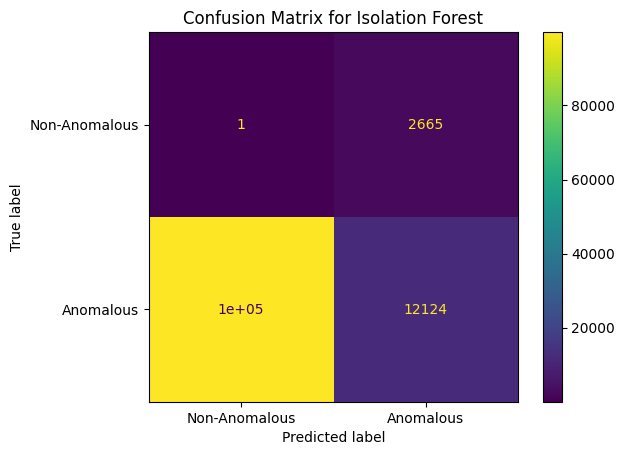

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Compute confusion matrix
cm_if = confusion_matrix(Y_test, y_pred_test, labels=[0, 1])

# Plot confusion matrix
disp_if = ConfusionMatrixDisplay(confusion_matrix=cm_if, display_labels=["Non-Anomalous", "Anomalous"])
disp_if.plot()
plt.title("Confusion Matrix for Isolation Forest")
plt.show()
